<a href="https://colab.research.google.com/github/saitejaswi1509/MLProjects/blob/main/K_Means_Clust_prj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Walmart Store Location Optimization using K-Means Clustering
------------------------------------------------------------
**Problem:**

Walmart wants to open a chain of stores across Florida and
needs to find optimal store locations to maximize revenue.

**Approach:**

Use K-Means clustering on customer location + sales data
(here, simulated using sklearn's make_blobs).

In [2]:
#Import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # seaborn for better visualization styles
import numpy as np

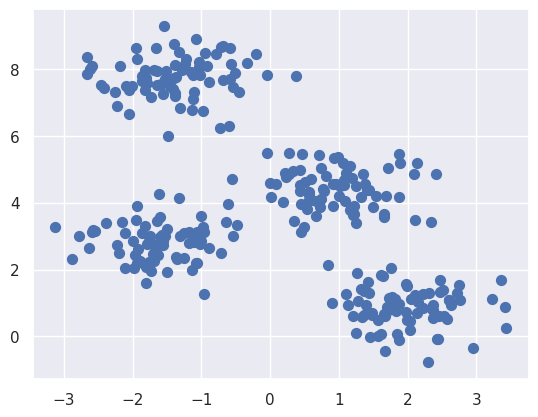

In [3]:
#Here generating synthetic customer data
#(In this scenario: Walmart using actual customer location + sales data)
from sklearn.datasets import make_blobs

# 300 sample data points to generate, grouped around 4 centers (simulating customer hubs)
X, y_true = make_blobs(n_samples=300, centers=4,
                        cluster_std=0.60, random_state=0)
plt. scatter (X[:, 0], X[:, 1], s=50);

In [4]:
#Applying K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans. fit(X)
y_kmeans = kmeans. predict (X)

In [5]:
y_kmeans

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

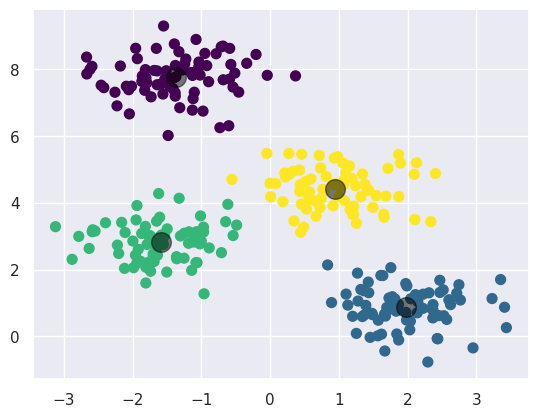

In [6]:
# Visualize Clusters and Store Locations
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
  # 1. Randomly choose clusters
  rng = np. random. RandomState(rseed)
  i = rng. permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
    #2a. Assign Labels based on closest center
    labels = pairwise_distances_argmin(X, centers)
    # 2b. Find new centers from means of points
    new_centers = np. array([X[labels == i].mean(0)
    for i in range(n_clusters)])
    # 2c. Check for convergence
    if np.all (centers == new_centers) :
      break
    centers = new_centers
  return centers, labels
centers, labels = find_clusters (X, 4)
plt. scatter (X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt. scatter (centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);